1. 기본 사용해보기

In [1]:
from ultralytics import YOLO

In [6]:
model = YOLO('yolov8n.pt')

# Perform object detection on an image using the model
result = model('가구.jpg')


image 1/1 d:\workspace\2024.04.03\.jpg: 480x640 1 chair, 1 potted plant, 1 vase, 120.9ms
Speed: 3.0ms preprocess, 120.9ms inference, 307.8ms postprocess per image at shape (1, 3, 480, 640)


In [9]:
## 결과를 확인해보세요
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255,

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

im_array = result[0].plot()
print(im_array)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


2. 각각 객체만 가져와서 표시해보기

In [11]:
import cv2
# 결과 객체에서 boxes 정보 가져오기 
boxes = result[0].boxes
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 0., 1., 0., 1.], device='cuda:0')
conf: tensor([0.9624, 0.4809, 0.4553, 0.4495, 0.4148, 0.2761], device='cuda:0')
data: tensor([[6.1092e+01, 1.4570e+02, 2.1474e+02, 3.1766e+02, 9.6237e-01, 1.0000e+00],
        [3.3044e+02, 1.9065e+02, 4.6228e+02, 3.7778e+02, 4.8091e-01, 1.0000e+00],
        [3.8791e+02, 7.7540e+01, 4.7931e+02, 1.4080e+02, 4.5534e-01, 0.0000e+00],
        [3.3101e+02, 8.0159e+01, 4.6664e+02, 3.7089e+02, 4.4949e-01, 1.0000e+00],
        [6.2087e+02, 4.8724e+01, 7.7803e+02, 3.2347e+02, 4.1481e-01, 0.0000e+00],
        [4.5244e+02, 8.9800e+01, 4.7957e+02, 1.4296e+02, 2.7611e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (533, 800)
shape: torch.Size([6, 6])
xywh: tensor([[137.9173, 231.6786, 153.6499, 171.9662],
        [396.3600, 284.2168, 131.8423, 187.1328],
        [433.6083, 109.1708,  91.3992,  63.2618],
        [398.8230, 225.5259, 135.6344, 290.7329],
        [69

In [32]:
roi = result[0].orig_img[407:239, 572:421]

In [12]:
names = result[0].names

In [13]:
boxes_xyxy = boxes.xyxy.cpu().numpy()  # .cpu().numpy()는 GPU에서 계산된 텐서를 CPU로 옮긴 후 NumPy 배열로 변환합니다.
class_ids = boxes.cls.cpu().numpy()  # 클래스 ID

# 원본 이미지 로드
orig_img = result[0].orig_img  # 이 예제에서는 이미 로드된 이미지를 사용합니다.

# # 경계 상자를 이용하여 ROI 추출하기
# 각 객체에 대한 경계 상자를 이용하여 ROI 추출 및 활용
for i, (box, class_id) in enumerate(zip(boxes_xyxy, class_ids)):
    # 경계 상자 좌표를 정수형으로 변환
    x1, y1, x2, y2 = map(int, box[:4])
    
    # 원본 이미지에서 해당 영역 추출
    roi = orig_img[y1:y2, x1:x2]
    class_name = names[class_id]
    print(class_name)
    
    # 추출된 ROI를 활용 (예: 화면에 표시하기)
    cv2.imshow(f'{class_name}_ROI', roi)
    cv2.waitKey(0)

cv2.destroyAllWindows()

Rock


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


3. 학습 시켜보기

In [6]:
# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
# results = model("zidane.jpg")  # predict on an image

Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning D:\workspace\2024.04.03\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning D:\workspace\2024.04.03\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.64G      3.015      4.767      2.562        217        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        128        929     0.0292    0.00113   0.000283   9.19e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.46G      2.966      4.749      2.502        218        640: 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        128        929     0.0288    0.00189   0.000297   8.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.69G      2.941      4.621      2.528        215        640: 100%|██████████| 8/8 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        128        929   3.85e-05    0.00577   0.000376   8.49e-05



3 epochs completed in 0.005 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


                   all        128        929   3.89e-05    0.00582   0.000373   8.44e-05
                person        128        254    0.00276      0.413     0.0265    0.00599
               bicycle        128          6          0          0          0          0
                   car        128         46          0          0          0          0
            motorcycle        128          5          0          0          0          0
              airplane        128          6          0          0          0          0
                   bus        128          7          0          0          0          0
                 train        128          3          0          0          0          0
                 truck        128         12          0          0          0          0
                  boat        128          6          0          0          0          0
         traffic light        128         14          0          0          0          0
             stop sig

val: Scanning D:\workspace\2024.04.03\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

4. 로보플로우 사이트를 이용한 데이터 학습

In [ ]:
# !pip install roboflow --user

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="0NcboRhp7evoa6Re3Nw9")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-14 in yolov8:: 100%|██████████| 14682/14682 [00:07<00:00, 2001.98it/s]


In [7]:
model = YOLO('yolov8n.pt')
results = model.train(data=r"D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\data.yaml", epochs=1)

Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\train\labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:07<00:00, 875.96it/s] 


train: New cache created: D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\train\labels.cache


val: Scanning D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\valid\labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:01<00:00, 544.26it/s]

val: New cache created: D:\workspace\2024.04.03\Rock-Paper-Scissors-SXSW-14\valid\labels.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.13G       1.27      2.941       1.46         10        640: 100%|██████████| 404/404 [00:48<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.30it/s]


                   all        576        400      0.471      0.473      0.464      0.258

1 epochs completed in 0.015 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.78it/s]


                   all        576        400      0.474      0.471      0.467      0.258
                 Paper        576        139      0.392      0.195       0.23       0.11
                  Rock        576        141      0.506      0.719      0.642      0.363
              Scissors        576        120      0.526        0.5      0.528      0.302
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\train4


In [2]:
!pip install roboflow

In [6]:

from roboflow import Roboflow
rf = Roboflow(api_key="FRabhiyko34GzKz9tOaY")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
result = model("가위바위보.jpg")
im_array = result[0].plot()



image 1/1 d:\workspace\2024.04.03\.jpg: 448x640 2 Papers, 4 Rocks, 140.9ms
Speed: 5.0ms preprocess, 140.9ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)


In [15]:
!pip install roboflow

In [1]:
from ultralytics import YOLO

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="mObtZJrgS1KprHsoAbIU")
project = rf.workspace("project-vwybe").project("project-dgpaz")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`


In [5]:
model = YOLO('yolov8n.pt')
results = model.train(data=r"D:\workspace\2024.04.03\Project-1\data.yaml", epochs=8)

Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\workspace\2024.04.03\Project-1\data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning D:\workspace\2024.04.03\Project-1\train\labels.cache... 203 images, 4 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]
val: Scanning D:\workspace\2024.04.03\Project-1\valid\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train12
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      2.09G      1.232      2.933      1.588         39        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         58         74    0.00396      0.933      0.306      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8       2.1G      1.237      2.377      1.584         43        640: 100%|██████████| 13/13 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         58         74     0.0039      0.917      0.228      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8       2.1G      1.234      2.145      1.596         37        640: 100%|██████████| 13/13 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         58         74      0.263      0.479      0.272      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8       2.1G      1.215      2.095      1.581         23        640: 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         58         74      0.439      0.437      0.356       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8       2.1G      1.164      1.927      1.524         30        640: 100%|██████████| 13/13 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         58         74      0.345      0.526      0.343      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8       2.1G      1.201      1.902      1.575         31        640: 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         58         74        0.4      0.638      0.505      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8       2.1G      1.167       1.85      1.502         42        640: 100%|██████████| 13/13 [00:01<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         58         74      0.413      0.594      0.481      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8       2.1G      1.139      1.707      1.489         36        640: 100%|██████████| 13/13 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         58         74       0.55      0.557      0.513      0.259



8 epochs completed in 0.008 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 6.2MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


                   all         58         74      0.399      0.639      0.504      0.264
              WaterDog         58         32      0.265      0.844      0.585      0.311
                walrus         58         42      0.532      0.433      0.424      0.217
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\train12


In [9]:
model = YOLO(r"D:\workspace\2024.04.03\runs\detect\train8\weights\best.pt")

In [10]:
model.val()

Ultralytics YOLOv8.1.42  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\workspace\2024.04.03\Project-1\valid\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


                   all         58         74    0.00396      0.933      0.308      0.142
              WaterDog         58         32    0.00346      0.938      0.263      0.145
                walrus         58         42    0.00447      0.929      0.353       0.14
Speed: 1.8ms preprocess, 10.0ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs\detect\val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FE0C5C0170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [7]:
from glob import glob
file_list = glob(r"D:\workspace\2024.04.03\Project-1\test\images\*.jpg")
file_list

['D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_124_jpg.rf.b58afc8d3682c0b1823855c2a2a3f0f8.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_130_jpg.rf.763e5514e860782935f215f958485c0b.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_131_jpg.rf.a5b4156a619f598fc64b2315da6bb662.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_137_jpg.rf.6beebd0cf5736c0cf05d632ec5e8677a.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_149_jpg.rf.d35b90f8143767967c727f9e071137bc.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_165_jpg.rf.d46b8dd77e5bf893b7b83bc97563b47f.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_176_jpg.rf.9b3ab11dc2774d70499716f8d54b0814.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_191_png.rf.9c0a02cc1cef86ca58b098f7317b1d2a.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\images\\-_193_jpg.rf.cc2a1d2d638794ddead5c30c66ae5974.jpg',
 'D:\\workspace\\2024.04.03\\Project-1\\test\\

In [16]:
model = YOLO(r"D:\workspace\2024.04.03\runs\detect\train12\weights\best.pt")

# Perform object detection on an image using the model
result = model(r'D:\workspace\Pinniped_test4.jpg')


image 1/1 D:\workspace\Pinniped_test4.jpg: 480x640 2 WaterDogs, 4 walruss, 134.4ms
Speed: 3.0ms preprocess, 134.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


In [14]:
## 결과를 확인해보세!!
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'WaterDog', 1: 'walrus'}
obb: None
orig_img: array([[[235, 222, 206],
        [235, 222, 206],
        [235, 222, 206],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[235, 222, 206],
        [235, 222, 206],
        [235, 222, 206],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[235, 222, 206],
        [235, 222, 206],
        [235, 222, 206],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[235, 222, 206],
        [235, 222, 206],
        [235, 222, 206],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255]],

       [[235, 222, 206],
        [235, 222, 206],
        [235, 222, 206],
        ...,
        [255, 255, 255],
        [254, 254, 254]

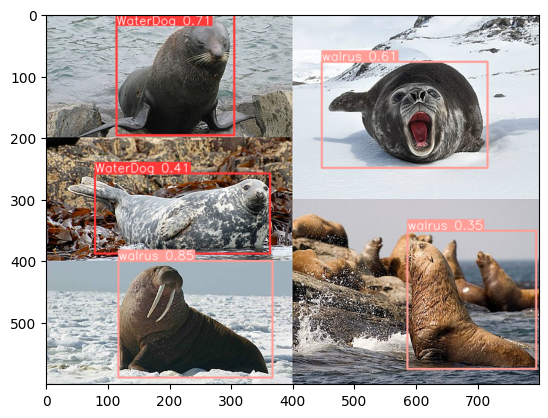

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
im_array = result[0].plot()
im = Image.fromarray(im_array[..., ::-1])
plt.imshow(im)
plt.show()

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

im_array = result[0].plot()
print(im_array)


[[[208 198 198]
  [208 198 198]
  [208 198 198]
  ...
  [216 206 206]
  [216 206 206]
  [216 206 206]]

 [[208 198 198]
  [208 198 198]
  [208 198 198]
  ...
  [217 207 207]
  [217 207 207]
  [217 207 207]]

 [[208 198 198]
  [208 198 198]
  [208 198 198]
  ...
  [217 207 207]
  [217 207 207]
  [217 207 207]]

 ...

 [[181 176 175]
  [178 173 172]
  [178 173 172]
  ...
  [178 172 167]
  [176 170 165]
  [175 169 164]]

 [[176 171 170]
  [173 168 167]
  [174 169 168]
  ...
  [171 165 160]
  [172 166 161]
  [171 165 160]]

 [[171 166 165]
  [169 164 163]
  [171 166 165]
  ...
  [163 157 152]
  [165 159 154]
  [166 160 155]]]


In [37]:
import matplotlib.pyplot as plt
from PIL import Image

# result[0].plot()으로 그래프 생성
fig = result[0].plot()
# 임시 파일로 저장
fig.savefig(r'D:\workspace\2024.04.03\Project-1\test\images\-_83_jpg.rf.4fbc5c96e1bb230cf5261f756743a3d8.jpg')

# 이미지 파일을 열어서 표시
im = Image.open(r'D:\workspace\2024.04.03\Project-1\test\images\-_83_jpg.rf.4fbc5c96e1bb230cf5261f756743a3d8.jpg')
plt.imshow(im)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'